## 1. 一元线性回归模型

$$
y=f(x)=b + wx
$$

### (1). 代价函数

$$
J(w) = \frac{1}{2m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})^2}
$$

### (2) 梯度下降

#### (i) 偏导

$$
\frac{\partial{J}}{\partial{w}} = \frac{1}{m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})x^{(i)}}\\
\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})}
$$

#### (ii) 参数更新

$$
w = w - \alpha*\frac{\partial{J}}{\partial{w}}\\
b = b - \alpha*\frac{\partial{J}}{\partial{b}}
$$

## 2. 多元线性回归模型

$$
y=f(x)=w_0 + w_1x_1 + w_2x_2 +...+w_nx_n
$$

### (1). 代价函数

$$
J(w) = \frac{1}{2m}\sum_{i=1}^m{(f^{(i)}(x) - y^{(i)})^2}
$$

### (2). 梯度下降

$$
\frac{\partial{J}}{\partial{w_j}} = \frac{1}{2m}\sum_{i=1}^{m}(f^{(i)}(x) - y^{(i)})x_j^{(i)} \\
w_j = w_j - \alpha * \frac{\partial{J}}{\partial{w_j}}
$$

## 3. 过程总结

* 假定此时有数据 $X_{m*n}, $  $y_{m*1}$，采用线性模型进行回归预测
* 如果数据规模过大进行归一化处理
* 超参数确定， 学习率 $\alpha$ 
* 初始化weight，确定梯度下降迭代次数，然后梯度下降法不断更新模型参数

## 4. python实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(X, theta):
    '''
    X: array (m * n)
    theta: array (n * 1)
    
    y_pred: array (m * 1)
    '''
    y_pred = X @ theta
    return y_pred

def computerCost(X, y, theta):
    '''
    X: array(m * n)
    y: array(m * 1)
    theta: array(n * 1)
    n should be the feature number plus 1
    '''
    m = len(y)
    y_pred = model(X, theta)
    J = 1/ (2*m) * ((y_pred - y).T @ (y_pred - y))
    return np.squeeze(J) 

In [3]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    X: array(m * n)
    y: array(m * 1)
    theta: array(n * 1)
    alpha: learning rate between (0, 1)
    num_iters: number of iteration times
    
    n should be the feature number plus 1
    '''
    m = len(y)
    n = len(theta)
    
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        y_pred = model(X, theta)
        theta = theta - (alpha / m * (X.T @ (y_pred - y)))
        J_history[i] = computerCost(X, y, theta)
        print('.', end='')
    return theta, J_history
        
def featureNormaliza(X):
    mu = np.mean(X, axis=0, keepdims=True)
    sigma = np.std(X, axis=0, keepdims=True)
    
    X_adjust = (X - mu) / sigma
    return X_adjust

#### 一个实例

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

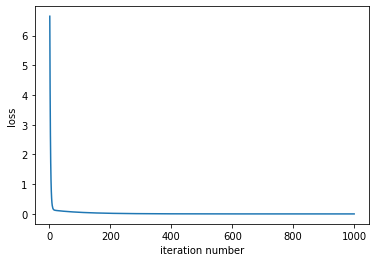

In [4]:
X = np.random.random((100, 4))
y = X @ np.array([[0.1], [0.2], [3], [2]]) + 3
#plt.scatter(X[:, 2], y)

X_adjust = np.hstack((np.ones((100, 1)), X))
theta = np.random.random((5, 1))
alpha = 0.1
num_iters = 1000

theta, J_history = gradientDescent(X_adjust, y, theta, alpha, num_iters)
plt.plot(np.arange(1,num_iters+1), J_history)
plt.xlabel('iteration number')
plt.ylabel('loss')
print('\ntheta:\n', theta)

## 5. pytorch 从零实现

In [10]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt


torch.Size([1000, 2]) torch.Size([1000, 1])


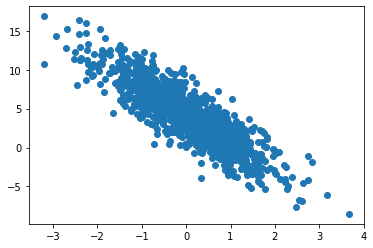

In [12]:
# 定义一个实例数据集并用迭代器生成batches

def synthetic_data(w, b, num_examples):
    X = torch.randn(size=(num_examples, len(w))) #pytorch 1.1.0不支持自定义size torch.normal(0, 1, size=(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.tensor([random.normalvariate(0, 0.01) for i in range(len(y))])#torch.normal(0, 0.01, size=y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape, labels.shape)

plt.scatter(features[:, 1], labels)

In [19]:
# 定义一个数据集batch生成的迭代器
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)]) #计算中每个数据都要转tensor吗，因为gpu原因？
        yield features[batch_indices, :], labels[batch_indices]

for X, y in data_iter(10, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2147,  0.2243],
        [ 1.6124, -0.7116],
        [ 1.0809,  0.5928],
        [ 0.4055,  1.2234],
        [ 0.1446,  0.3353],
        [-0.9852, -0.5864],
        [ 0.4711,  0.4845],
        [-0.3530, -0.0226],
        [-0.2574,  0.7735],
        [-1.5791, -0.1638]]) 
 tensor([[3.0004],
        [9.8292],
        [4.3521],
        [0.8500],
        [3.3449],
        [4.2281],
        [3.5094],
        [3.5622],
        [1.0633],
        [1.6302]])


In [28]:
# pytorch 从零实现线性回归

## 1.定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b
## 2.定义损失
def square_loss(y_hat, y):
    return torch.sum((y_hat - y.reshape(y_hat.shape))**2 / 2) 
## 3.定义优化算法
def sgd(params, lr, batch_size):
    # 根据每次小批次backward计算的grad更新参数
    # 因为更新参数并不参与计算图，所以no_grad
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # 把batch_size放在这里我认为可以减小每次算len(y)
            # 因为pytorch有累积梯度的模式，所以更新完计算下一次梯度前需要清零
            # pytorch这种累积梯度的模式有利于多重loss相加的模式 loss1+loss2+loss3
            param.grad.zero_() 
## 4. 设置超参数和初始化超参数
lr = 0.03
num_epochs = 3
batch_size=10
net = linreg
loss = square_loss
w = torch.randn(size=(2,1), requires_grad=True)
b = torch.randn(1, requires_grad=True)
## 5. 训练
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        cur_loss = loss(net(X, w, b), y)
        cur_loss.backward()
        sgd([w, b], lr, batch_size)
    # 打印一轮epoch后的loss
    with torch.no_grad():
        cur_loss = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(cur_loss)/len(labels):0.5f}')
print('true params')
print(true_w, '\n', true_b)
print('predict params')
print(w, '\n', b)


epoch 1, loss 0.04184
epoch 2, loss 0.00015
epoch 3, loss 0.00005
true params
tensor([ 2.0000, -3.4000]) 
 4.2
predict params
tensor([[ 2.0000],
        [-3.3994]], requires_grad=True) 
 tensor([4.1997], requires_grad=True)


## 6. 调用pytorch的nn网络和utils模块实现

In [31]:
import torch
from torch.utils import data
from torch import nn
import numpy as np

In [30]:
## 模拟的数据集还是和上一小节一样
# true_w, true_b, features, labels

## 调用data.TensorDataset, data.DataLoader api实现构造数据batch迭代器
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-0.4523,  1.0501],
         [-0.6016,  1.5562],
         [ 0.1446,  0.3353],
         [ 0.5227, -0.6455],
         [ 1.9285, -1.1597],
         [-0.9330,  1.0553],
         [-1.4143, -0.2958],
         [ 0.0914,  1.7845],
         [ 1.7646, -0.7384],
         [-0.9789,  0.4739]]),
 tensor([[-0.2966],
         [-2.2894],
         [ 3.3449],
         [ 7.4393],
         [12.0006],
         [-1.2617],
         [ 2.3584],
         [-1.6929],
         [10.2376],
         [ 0.6367]])]

In [33]:
## 1. 网络定义直接调用torch.nn模块
net = nn.Sequential(nn.Linear(2, 1))
# 参数初始化
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

## 2. loss
loss = nn.MSELoss()

## 3. 优化方法
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## 4. 训练
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        cur_loss = loss(net(X), y)
        trainer.zero_grad()
        cur_loss.backward()
        trainer.step()
    cur_loss = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {cur_loss:f}')
print('true params')
print(true_w, '\n', true_b)
print('predict params')
print(net[0].weight.data, '\n', net[0].bias.data)

epoch 1, loss 0.000253
epoch 2, loss 0.000104
epoch 3, loss 0.000104
true params
tensor([ 2.0000, -3.4000]) 
 4.2
predict params
tensor([[ 1.9994, -3.3981]]) 
 tensor([4.2004])
